#### *Now we'll practise all that we have learned,going step by step just codeing for the time being with documentation within this notebook but not in other files.*

##### video timestamp : 7:38:25 - 8:27:57

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#checking pytorch version
torch.__version__

'2.7.0+cpu'

In [2]:
# creating device agnostics code 
device="cude" if torch.cuda.is_available() else  "cpu"
print(f"using device : {device}")

using device : cpu


$1. Creating Data$

In [3]:
#creating data using the linear formula
weight=0.7
bias=0.3

# creating ranage
start=0
end=1
step=0.02

#creating X and Y
X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = weight*X+ bias

X[:10] ,Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
#spliting data into testing and training sets
train_split=int(0.8*len(X))
X_train,Y_train=X[:train_split],Y[:train_split]
X_test,Y_test=X[train_split:],Y[train_split:]
 
len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

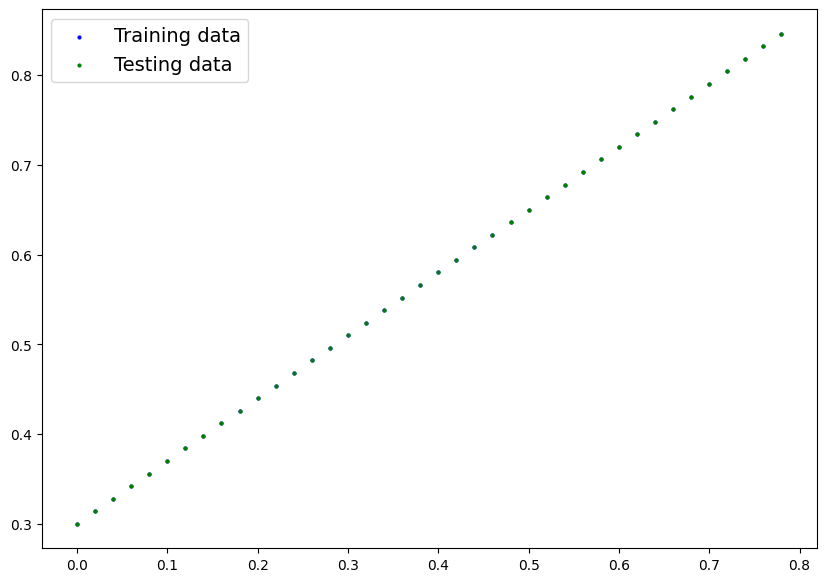

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions,
    """
    
    plt.figure(figsize=(10,7))
    
    #Plot training data in blue
    plt.scatter(train_data,train_labels,c="b",s=4, label="Training data")
    
    #Plot test data in blue
    plt.scatter(train_data,train_labels,c="g",s=4, label="Testing data")
    
    if predictions is not None:
        #plot predictions if they appear
        plt.scatter(test_data,predictions,c="r",s=4,label="predictions")
    
    #show the legends
    plt.legend(prop={"size":14})
    
    
    
#plotting the data
plot_predictions(X_train,Y_train,X_test,Y_test)

$2.Building Linear Regression Model$

In [ ]:
#cerating a linear model by subclassing nn.module

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        #We'll use nn.Linear
        self.linear_layer=nn.Linear(in_features=1,
                                    out_features=1)
        
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.linear_layer(x)
    
#set manual seed
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

$3.Training The Model$

In [9]:
"""
for training we need :
1. Loss function
2. Optimizer
3. Training Loop
4. Testing loop
"""

#setting up loss function
loss_fn=nn.L1Loss()

#setting up optimimzer
optimizer=torch.optim.SGD(params=model_1.parameters(),
                      lr=0.01,)


In [11]:
#training and testing loop
torch.manual_seed(42)
epochs=200

for epoch in range(epochs):
    model_1.train()
    
    # 1.forward pass
    y_pred=model_1(X_train)
    
    # 2. calculate loss
    loss=loss_fn(y_pred,Y_train)
    
    # 3.optimizer
    optimizer.zero_grad()
    
    # 4. perform backpropogation
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    
    #testing
    
    model_1.eval()
    with torch.inference_mode():
        test_pred=model_1(X_test)
        
        test_loss=loss_fn(test_pred,Y_test)
    
    #printing results
    if(epoch%10==0):
        print(f"Epoch: {epoch} |Loss :{loss} | Test loss:{test_loss}")

Epoch: 0 |Loss :0.5436569452285767 | Test loss:0.5605052709579468
Epoch: 10 |Loss :0.42844706773757935 | Test loss:0.42579537630081177
Epoch: 20 |Loss :0.31323719024658203 | Test loss:0.2910855710506439
Epoch: 30 |Loss :0.1980273276567459 | Test loss:0.1563757359981537
Epoch: 40 |Loss :0.0828174576163292 | Test loss:0.021665919572114944
Epoch: 50 |Loss :0.023356426507234573 | Test loss:0.048834484070539474
Epoch: 60 |Loss :0.019609849900007248 | Test loss:0.04538799077272415
Epoch: 70 |Loss :0.01618141308426857 | Test loss:0.03711546212434769
Epoch: 80 |Loss :0.012742981314659119 | Test loss:0.028842901811003685
Epoch: 90 |Loss :0.0093079237267375 | Test loss:0.02125726267695427
Epoch: 100 |Loss :0.005878164432942867 | Test loss:0.012984687462449074
Epoch: 110 |Loss :0.002439356641843915 | Test loss:0.004712158348411322
Epoch: 120 |Loss :0.010256484150886536 | Test loss:0.0003308236482553184
Epoch: 130 |Loss :0.010256484150886536 | Test loss:0.0003308236482553184
Epoch: 140 |Loss :0.01

In [12]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]])),
             ('linear_layer.bias', tensor([0.2925]))])

$4.Making And Evaluating Predictions$

In [13]:
model_1.eval()

with torch.inference_mode():
    y_preds=model_1(X_test)
    
y_preds

tensor([[0.8468],
        [0.8607],
        [0.8746],
        [0.8884],
        [0.9023],
        [0.9161],
        [0.9300],
        [0.9438],
        [0.9577],
        [0.9716]])

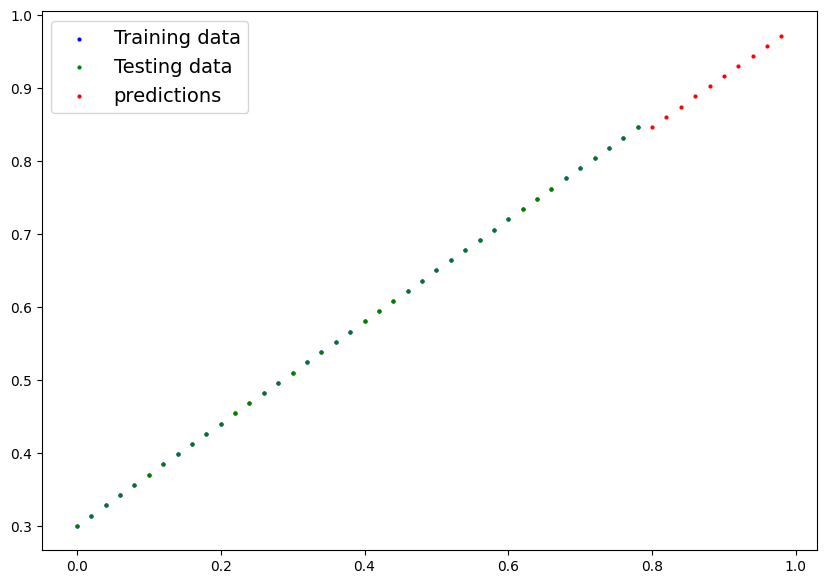

In [14]:
plot_predictions(predictions=y_preds)

$5. Saving and loading Model$

In [ ]:
#saving our model
from pathlib import Path

MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok =True)

# Creating model save path
MODEL_NAME= "PytorchWorkFolowModel1.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

# saving model state_dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to models\PytorchWorkFolowModel1.pth


In [16]:
#loading our model
loaded_model_1=LinearRegressionModelV2()

#loading the saved model_1 state_dict()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))



<All keys matched successfully>

In [17]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]])),
             ('linear_layer.bias', tensor([0.2925]))])

In [18]:
#evaluating loaded model

loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds=loaded_model_1(X_test)
    
y_preds== loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])